<a href="https://colab.research.google.com/github/GourabR/Quantium---Customer-Analytics/blob/main/EDA_Chips_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Type** - EDA

**Contribution** - Individual

**Graphs used for the analysis:**



*   Box plot

*   Piechart

*   Barplot

*   Lineplot

*   Heatmap


# Business Objective

The data from Chips transaction of an entire year and customer's purchasing behaviour holds immense potential in driving the success of Chips-selling businesses. By analyzing this data, actionable insights can be extracted to help capture the Chips selling market effectively.

Businesses are run by data. The more relative data we have the more easier to run the business successfully. Our objective in this analysis is to deep dive into the two datasets and take out the valuable insights in order to help our chips category manager to come up with useful strategies of selling chips for the next half years.


# ***Let's Start!***

In [ ]:
# Importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
from datetime import timedelta
from datetime import datetime

In [ ]:
# Loading the datasets.
cust_data = pd.read_csv('/content/QVI_purchase_behaviour.csv')
trans_data = pd.read_excel('/content/QVI_transaction_data.xlsx')

In [ ]:
# First view of the customer dataset
cust_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
# Checking the shape of the dataframe.
cust_data.shape

(72637, 3)

In [ ]:
# Checking for null values.
cust_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [ ]:
# First view of the transaction dataset.
trans_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
# Checking the shape of the dataframe.
trans_data.shape

(264836, 8)

In [ ]:
# Checking for null values.
trans_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

# About the dataset:

Based on our inspection the customer data has 72637 rows and 3 columns, and have no null values.

Here is a breakdown of each column:

**LYLTY_CARD_NBR** - A unique card given to those customers who join the loyalty program. Based on previous knowledge we can say that the loyalty card number given to each customer is unique.

**LIFESTAGE** - This column tells us about excatly what lifestage is the customer at, for example : single/couple/retirees/old/young etc.

**PREMIUM_CUSTOMER** - This column has three unique values, such as Premium, Mainstream, and Budget. These are the categories of the customers based on their previous purchasing behaviour.

Based on our inspection the transaction data has 264846 rows and 8 columns, and have no null values.

Here is a breakdown of the columns:

**Date** - As the name suggests, this column has dates recorded based on the number of transactions happened on that particular day.

**STORE_NBR** - Each store has a unique number. In this column the store numbers are recorded, tells us the store number which indicates a particular store from which the purchasing has been done.

**LYLTY_CARD_NBR** - A unique card given to those customers who join the loyalty program. Based on previous knowledge we can say that the loyalty card number given to each customer is unique.

**TXN_ID** - As the name suggests, this column contains transaction id. Every transaction has it's own unique id.

**PROD_NBR** - Each chips packet has it's own unique number based on the brand name, flavour and some other things. This column holds that unique number of every chips packet.

**PROD_NAME** - This column has the name of the chips along with it's brand name and quantity.

**PROD_QTY** - This column is a numeric column which holds how many packets were sold in each transaction of a particular chips.

**TOY_SALES** - This column tells us about the total sales of each transaction.

In [ ]:
# Understanding the overall dataset.
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
# Understanding the overall dataset.
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


# *DATE CLEANING AND PROCESSING*

In [ ]:
# Checking for the duplicates if present in the dataset customer.
cust_data[cust_data.duplicated()]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER


In [ ]:
# Checking for the duplicates if present in the dataset transaction.
trans_data[trans_data.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


***Note:*** As we can see there is a duplicate row present in our dataset. We must remove the row before starting EDA.

In [ ]:
# Checking the columns which are duplicated.
trans_data[trans_data['TXN_ID'] == 108462]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124844,43374,107,107024,108462,18,Cheetos Chs & Bacon Balls 190g,2,6.6
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


***Note:*** Although the values are duplicated but it could be that the person have bought multiple products under the same transaction_id from the same store. Let's check more..

In [ ]:
# Checking the column date and it's values.
trans_data['DATE'].value_counts()

43458    939
43457    917
43456    915
43453    906
43452    862
        ... 
43446    664
43640    662
43629    659
43391    658
43429    648
Name: DATE, Length: 364, dtype: int64

***Note :*** As we can see the data that we have inside the DATE column in the table trans_data is integer. We must convert it into a proper date format.

In [ ]:
# We should always make a copy of the original dataset.
trans_data1 = trans_data.copy()

In [ ]:
# Creating a function which will take a column as input and convert it in the proper date form.
def date_format(column):

  date = pd.to_datetime('1900-01-01') + timedelta(column-2)
  return date

In [ ]:
# Applying the function to the column date.
trans_data1['NEW_DATE'] = trans_data1['DATE'].apply(date_format)

In [ ]:
# Checking the date column.
trans_data1['NEW_DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: NEW_DATE, Length: 264836, dtype: datetime64[ns]

In [ ]:
# Now we can drop the original DATE column which contains integer.
trans_data1.drop('DATE', axis = 1, inplace = True)

In [ ]:
# Checking the measure of spread and central tendency of the column Product Quantity.
trans_data1['PROD_QTY'].describe()

count    264836.000000
mean          1.907309
std           0.643654
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

<Axes: >

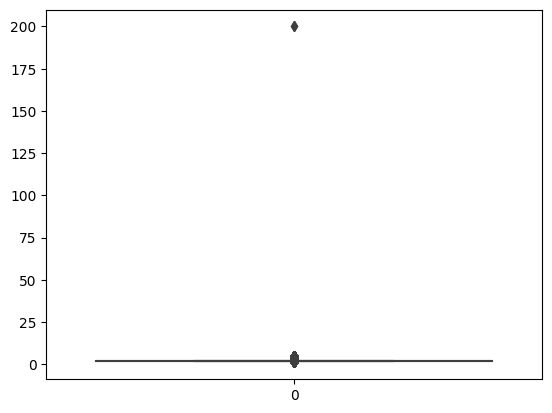

In [ ]:
# Checking the measure of spread and central tendency of the column Product Quantity with the help of boxplot.
sns.boxplot(trans_data1['PROD_QTY'])

***Note:*** As we can see from the above boxplot, there is an outlier in Product Quantity column in our dataset. Let's check further.

In [ ]:
# Checking the row in which the Product Quantity column posses an outlier.
trans_data1[trans_data1['PROD_QTY'] > 100]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,NEW_DATE
69762,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,2018-08-19
69763,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,2019-05-20


In [ ]:
# We will consider this as an outlier because it will impact in our analysis. It's better to drop the rows which contain the outliers.
trans_data1.drop(trans_data1.index[np.where(trans_data1['PROD_QTY'] > 100)], axis=0, inplace=True)

***Note:*** Here in our transaction dataset we have number of unit sold and the total sales per transaction, but we don't have price mentioned in our dataset.
Let's calculate the price of each unit of each transaction, that will help us in further analysis.

<Axes: >

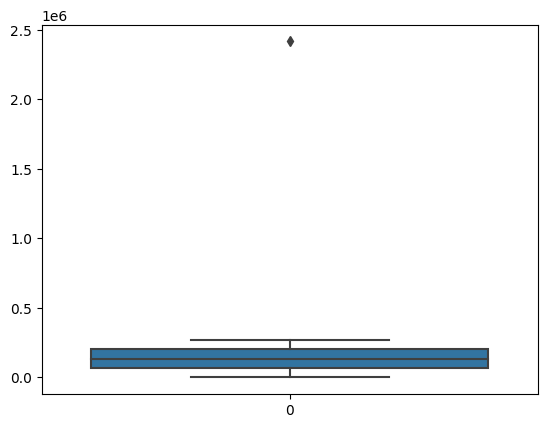

In [ ]:
# Checking for any outlier present in the column transaction_id.
sns.boxplot(trans_data1['TXN_ID'])

***Note:*** As we can see there is an outlier in the column Transaction_id. Let's check the row which has the outlier.

In [ ]:
# Checking the entire row which has the outlier for the column transaction_id.
trans_data1[trans_data1['TXN_ID'] == trans_data1['TXN_ID'].max()]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,NEW_DATE
15726,88,237324,2415841,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8,2018-12-20


***Note:*** We will consider this as an outlier as it may create an affect in our further analysis. Let's continue..

In [ ]:
# Let's drop the row.
trans_data1.drop(trans_data1.index[np.where(trans_data1['TXN_ID'] == 2415841)], axis=0, inplace=True)

<Axes: >

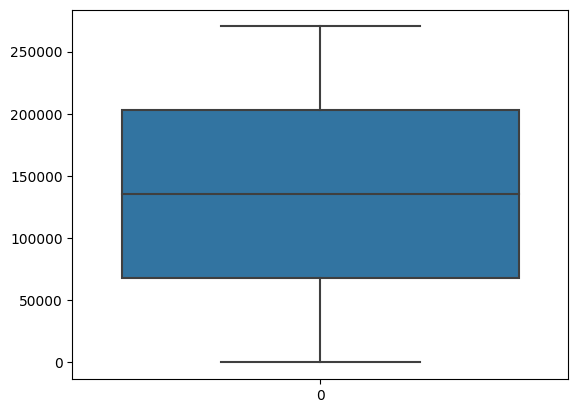

In [ ]:
# Visualizing through boxplot.
sns.boxplot(trans_data1['TXN_ID'])

<Axes: >

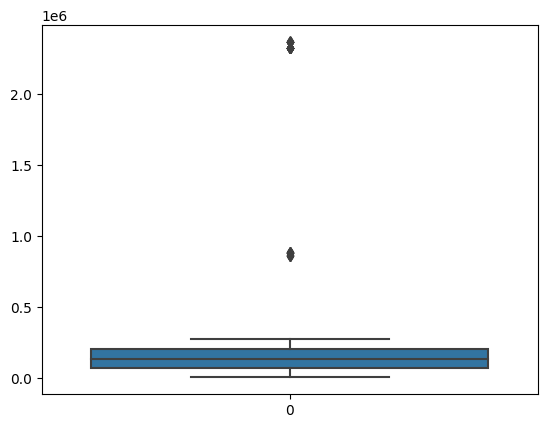

In [ ]:
# Checking outlier for the column LYLTY_CARD_NBR if any.
sns.boxplot(trans_data1['LYLTY_CARD_NBR'])

In [ ]:
# fetching 25 percentile of the column LYLTY_CARD_NBR
percentile25 = trans_data1['LYLTY_CARD_NBR'].quantile(0.25)

In [ ]:
# fetching 75 percentile of the column LYLTY_CARD_NBR
percentile75 = trans_data1['LYLTY_CARD_NBR'].quantile(0.75)

In [ ]:
# Creating Inter Quartile Range of the column LYLTY_CARD_NBR
iqr = percentile75 - percentile25

In [ ]:
# Creating a variable 'max' which will hold the maximum value of which we call five number summary, beyond which numbers will be considered as outliers.
max = percentile75 + 1.5*(iqr)

In [ ]:
# Checking how many unique values are there beyond the above defined maximum number for the column LYLTY_CARD_NBR.
trans_data1[trans_data1['LYLTY_CARD_NBR'] > max]['LYLTY_CARD_NBR'].nunique()

34

In [ ]:
trans_data1[trans_data1['LYLTY_CARD_NBR'] > max]['TXN_ID'].nunique()

44

In [ ]:
# Checking the entire row in which the LYLTY_CARD_NBR is greater than the maximum LYLTY_CARD_NBR.
trans_data1[trans_data1['LYLTY_CARD_NBR'] > max].sort_values(by = 'LYLTY_CARD_NBR', ascending = True)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,NEW_DATE
123456,155,861921,85336,4,Dorito Corn Chp Supreme 380g,2,13.0,2019-06-26
140568,155,861951,85355,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,2019-06-26
191105,155,861961,85362,11,RRD Pc Sea Salt 165g,2,6.0,2019-06-12
191118,155,862501,85678,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,2019-06-28
191117,155,862501,85677,78,Thins Chips Salt & Vinegar 175g,2,6.6,2019-06-14
39777,237,880171,86305,32,Kettle Sea Salt And Vinegar 175g,2,10.8,2018-09-14
39778,237,880171,86306,24,Grain Waves Sweet Chilli 210g,2,7.2,2018-09-28
123510,237,880551,86491,59,Old El Paso Salsa Dip Tomato Med 300g,2,10.2,2018-09-11
39794,237,880711,86566,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,2018-09-04
39795,237,880711,86567,3,Kettle Sensations Camembert & Fig 150g,2,9.2,2018-09-15


***Note:*** These values don't seem to be outliers. We will keep these values in our dataframe for our further analysis.

In [ ]:
# Creating a column PRICE_OF_1_UNIT which will hold the prices of the product of each quantity.
trans_data1['PRICE_OF_1_UNIT'] = trans_data1['TOT_SALES']/trans_data1['PROD_QTY']

In [ ]:
# Checking the dataframe.
trans_data1.head(5)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,NEW_DATE,PRICE_OF_1_UNIT
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,3.00
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,2.10
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,1.45
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,3.00
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18,4.60


***Note***: After creating the new column PRICE_OF_1_UNIT, it is seen that some product have 2 or more different prices. After evaluating the column we came to know that prices are differing because of some wrong input value in product quantity column. It has been decided to keep the first price for every product that have multiple prices. And revaluate the Product Quantity column for our further analysis.

In [ ]:
# Creating a copy of the dataset.
trans_data2 = trans_data1.copy()

In [ ]:
# Creating a dataframe which will have two column such as product name and their revised prices and mergeing that dataframe with our original dataframe.
price_mapping = trans_data2.groupby('PROD_NAME')['PRICE_OF_1_UNIT'].agg(lambda x: x.value_counts().idxmax())

product_prices = pd.DataFrame(price_mapping).reset_index()
product_prices.columns = ['PROD_NAME', 'REVISED_PRICE']

trans_data2 = pd.merge(trans_data2, product_prices, on='PROD_NAME', how='left')

In [ ]:
# Checking the dataframe.
trans_data2.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,NEW_DATE,PRICE_OF_1_UNIT,REVISED_PRICE
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,3.00,3.0
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,2.10,2.1
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,1.45,2.9
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,3.00,3.0
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18,4.60,4.6


In [ ]:
# Recalculating the product quantity sold in every transaction.
trans_data2['REVISED_PROD_QTY'] = trans_data2['TOT_SALES'] / trans_data2['REVISED_PRICE']

In [ ]:
# Checking how much valid the column that we have created after recalculating.
trans_data2[trans_data2['REVISED_PROD_QTY'] < 1]['PROD_NAME'].value_counts()

Dorito Corn Chp     Supreme 380g    88
Name: PROD_NAME, dtype: int64

***Note:*** It has been seen that after recalculating the product quantity, some product quantity have values less than 1, which cannot be accurate as every chips packets already have a defined quantity. It is called quantization, the number of product customers buy cannot be decimal, it always has to be a positive integer in this case.

In [ ]:
# Dropping those rows which contain values less than 1 for the column Product Quantity.
trans_data2.drop(trans_data2[trans_data2['REVISED_PROD_QTY'] < 1].index, axis = 0, inplace = True)

In [ ]:
# Dropping the old price and product quantity column.
trans_data2.drop(['PROD_QTY','PRICE_OF_1_UNIT'], axis = 1, inplace = True)

In [ ]:
# As mentioned earlier, product quantoties cannot be decimal in this case, it is better to covert them in integer.
trans_data2['REVISED_PROD_QTY'] = trans_data2['REVISED_PROD_QTY'].astype(int)

In [ ]:
# Extracting month and year from the Date column.
trans_data2['NEW_DATE'] = pd.to_datetime(trans_data2['NEW_DATE'])
trans_data2['MONTH'] = trans_data2['NEW_DATE'].dt.strftime('%B')

trans_data2['NEW_DATE'] = pd.to_datetime(trans_data2['NEW_DATE'])
trans_data2['YEAR'] = trans_data2['NEW_DATE'].dt.year

In [ ]:
# Merging the two dataframes.
merged_df = pd.merge(trans_data2,cust_data, on = 'LYLTY_CARD_NBR')

In [ ]:
# Extracting the Brand_name and the quantity from the column Product_name will help us in further analysis.
col1_values = []
col2_values = []

for i in range(len(merged_df)):

    words = merged_df.iloc[i]['PROD_NAME'].split()

    col1_value = words[0] if words else None
    col2_value = words[-1] if words else None

    col1_values.append(col1_value)
    col2_values.append(col2_value)

merged_df['col1'] = col1_values
merged_df['col2'] = col2_values

In [ ]:
# Checking the dataframe.
merged_df.sample(5)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,TOT_SALES,NEW_DATE,REVISED_PRICE,REVISED_PROD_QTY,MONTH,YEAR,LIFESTAGE,PREMIUM_CUSTOMER,col1,col2
145984,180,180092,181572,102,Kettle Mozzarella Basil & Pesto 175g,10.8,2019-02-28,5.4,2,February,2019,RETIREES,Budget,Kettle,175g
23317,199,199253,198687,23,Cheezels Cheese 330g,11.4,2018-10-10,5.7,2,October,2018,MIDAGE SINGLES/COUPLES,Premium,Cheezels,330g
156519,40,40311,37531,49,Infuzions SourCream&Herbs Veg Strws 110g,7.6,2019-05-02,3.8,2,May,2019,RETIREES,Mainstream,Infuzions,110g
154459,5,5046,4643,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,9.2,2018-09-27,4.6,2,September,2018,RETIREES,Mainstream,Kettle,150g
235803,213,213035,212062,60,Kettle Tortilla ChpsFeta&Garlic 150g,9.2,2019-01-08,4.6,2,January,2019,YOUNG SINGLES/COUPLES,Budget,Kettle,150g


In [ ]:
# Checking the newly created column which holds the packet quantity.
merged_df['col2'].value_counts()

175g                  60560
150g                  41633
134g                  25102
110g                  22387
170g                  18502
165g                  15297
330g                  12540
300g                  12041
380g                   6328
200g                   4473
Salt                   3257
Chicken270g            3170
250g                   3169
210g                   3167
Ht300g                 3125
270g                   3115
210G                   3105
90g                    3008
190g                   2995
160g                   2970
220g                   1564
70g                    1507
150G                   1498
Chs&Onion170g          1481
180g                   1468
SeaSalt175g            1468
Chli&S/Cream175G       1461
Chckn175g              1460
125g                   1454
CutSalt/Vinegr175g     1440
Name: col2, dtype: int64

In [ ]:
# As we can see there are some invaid values in the column, one of them is 'salt'.
merged_df[merged_df['col2'] == 'Salt']

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,TOT_SALES,NEW_DATE,REVISED_PRICE,REVISED_PROD_QTY,MONTH,YEAR,LIFESTAGE,PREMIUM_CUSTOMER,col1,col2
101,39,39167,35644,63,Kettle 135g Swt Pot Sea Salt,8.4,2019-04-30,4.2,2,April,2019,MIDAGE SINGLES/COUPLES,Budget,Kettle,Salt
132,45,45127,41120,63,Kettle 135g Swt Pot Sea Salt,8.4,2018-11-23,4.2,2,November,2018,MIDAGE SINGLES/COUPLES,Budget,Kettle,Salt
152,55,55072,48881,63,Kettle 135g Swt Pot Sea Salt,8.4,2019-04-01,4.2,2,April,2019,MIDAGE SINGLES/COUPLES,Budget,Kettle,Salt
262,83,83008,82099,63,Kettle 135g Swt Pot Sea Salt,8.4,2019-05-20,4.2,2,May,2019,MIDAGE SINGLES/COUPLES,Budget,Kettle,Salt
359,106,106147,107637,63,Kettle 135g Swt Pot Sea Salt,8.4,2019-02-10,4.2,2,February,2019,MIDAGE SINGLES/COUPLES,Budget,Kettle,Salt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264498,260,260135,259297,63,Kettle 135g Swt Pot Sea Salt,8.4,2018-10-08,4.2,2,October,2018,YOUNG SINGLES/COUPLES,Premium,Kettle,Salt
264501,260,260240,259480,63,Kettle 135g Swt Pot Sea Salt,8.4,2018-10-08,4.2,2,October,2018,YOUNG SINGLES/COUPLES,Premium,Kettle,Salt
264511,261,261035,259860,63,Kettle 135g Swt Pot Sea Salt,8.4,2019-06-12,4.2,2,June,2019,YOUNG SINGLES/COUPLES,Premium,Kettle,Salt
264652,266,266413,264246,63,Kettle 135g Swt Pot Sea Salt,4.2,2018-07-20,4.2,1,July,2018,YOUNG SINGLES/COUPLES,Premium,Kettle,Salt


In [ ]:
# Converting the word 'salt' with the accurate packet quantity in the column Col2.
for i in merged_df[merged_df['col2'] == 'Salt'].index:
    word1 = merged_df.loc[i, 'PROD_NAME'].split()
    item = word1[1]
    merged_df.loc[i, 'col2'] = item

In [ ]:
# As the last three strings are the actual quantity which we want, let's extract those strings and assign them to their respective rows.
merged_df['col2'] = merged_df['col2'].str[-4:-1]

In [ ]:
# Checking the column after converting them into valid datapoints.
merged_df['col2'].value_counts()

175    66389
150    43131
134    25102
110    22387
170    19983
165    15297
300    15166
330    12540
380     6328
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: col2, dtype: int64

In [ ]:
# Converting the column into integer.
merged_df['col2'] = merged_df['col2'].astype(int)

In [ ]:
# Renaming the two newly created column.
merged_df.rename(columns = {'col1':'BRAND_NO','col2':'SIZE_OF_PACK(GRAM)'}, inplace = True)

In [ ]:
merged_df.sample(5)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,TOT_SALES,NEW_DATE,REVISED_PRICE,REVISED_PROD_QTY,MONTH,YEAR,LIFESTAGE,PREMIUM_CUSTOMER,BRAND_NO,SIZE_OF_PACK(GRAM)
76675,147,147039,145955,32,Kettle Sea Salt And Vinegar 175g,10.8,2019-02-05,5.4,2,February,2019,OLDER FAMILIES,Premium,Kettle,175
223320,113,113183,116628,95,Sunbites Whlegrn Crisps Frch/Onin 90g,3.4,2019-05-27,1.7,2,May,2019,YOUNG FAMILIES,Premium,Sunbites,90
224282,144,144130,144587,98,NCC Sour Cream & Garden Chives 175g,6.0,2019-01-02,3.0,2,January,2019,YOUNG FAMILIES,Premium,NCC,175
45033,113,113221,116866,29,French Fries Potato Chips 175g,6.0,2019-03-29,3.0,2,March,2019,OLDER FAMILIES,Budget,French,175
164379,157,157227,159868,105,Woolworths Cheese Rings 190g,3.6,2019-06-18,1.8,2,June,2019,RETIREES,Mainstream,Woolworths,190


# *Exploratory Data Analysis And Visualizaion.*

# Some metrices of interest to the client:



*   What is the percentage ratio of different types of customers in our dataset?
*   What are the favourate brands of each type of customers?
*   What is the breakdown of total sales by each customer type?
*   What are the different lifestages of customers and percentage of each one of them in our data?
*   What is the breakdown of total sales by different types of lifestages of the customers?
*   Overall what are the preferred brands of the customers?
*   What are the preferred packet size?
*   Which brands are doing good in terms of sales?
*   Find out the sales performance figures of each month? How did the sale go? Was it consistent throughout the year?
*   Are the customers multi-pack buyers? If yes, then what are the ratio of multi-pack buyer customer as compared to the total number of customers?
*   At which lifestage customers buy more chips packets.



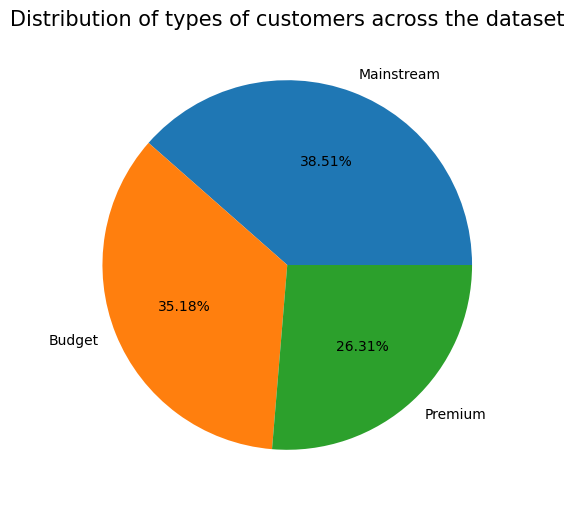

In [ ]:
# Visualizing the distribution of the type of customers accross our dataset.
plt.figure(figsize=(12,6))
plt.pie(merged_df.PREMIUM_CUSTOMER.value_counts(), labels=merged_df.PREMIUM_CUSTOMER.value_counts().index, autopct='%1.2f%%')

plt.title('Distribution of types of customers across the dataset', fontsize = 15)
plt.show()

***Inference:*** As we can see in the above piechart, most of the customers are mainstream, followed by budget customer and premium customer.

We can assume that the mainstream customer neither very price concious not they spend too much on chips, where as the budget customers tend to focus more on quantity rather than quality. And the premium customers spend more to get quality products. Let's continue..

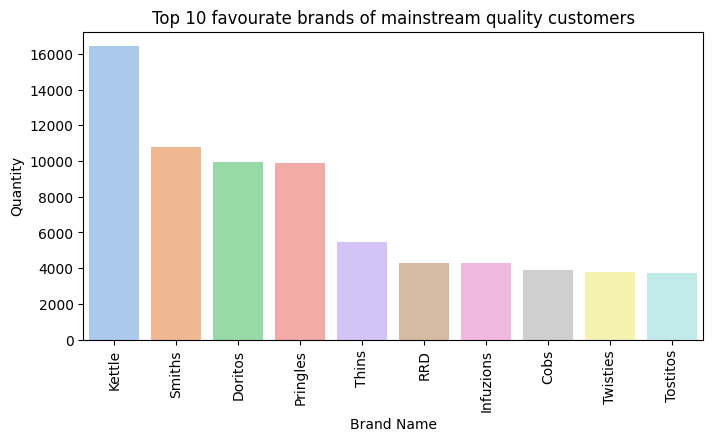

In [ ]:
# Visualizing the top 10 favourate brands of mainstream quality customers.
plt.figure(figsize = (8,4))
sns.barplot(x = merged_df[merged_df['PREMIUM_CUSTOMER'] == 'Mainstream']['BRAND_NO'].value_counts().head(10).index, y = merged_df[merged_df['PREMIUM_CUSTOMER'] == 'Mainstream']['BRAND_NO'].value_counts().head(10), palette = 'pastel')
plt.xlabel('Brand Name')
plt.ylabel('Quantity')
plt.title('Top 10 favourate brands of mainstream quality customers')
plt.xticks(rotation = 90)
plt.show()

***Inference:*** from the above graph we can see that Kettle is the favourite brand of the mainstream customer, followed by Smiths, Doritos, Pringles etc.

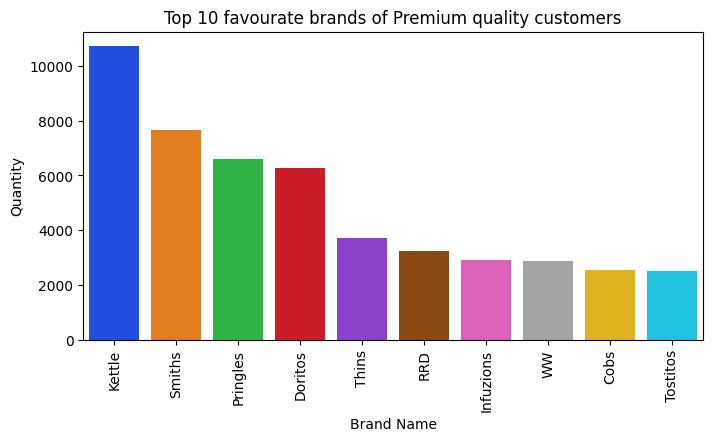

In [ ]:
# Visualizing the top 10 favourate brands of Premium quality customers.
plt.figure(figsize = (8,4))
sns.barplot(x = merged_df[merged_df['PREMIUM_CUSTOMER'] == 'Premium']['BRAND_NO'].value_counts().head(10).index, y = merged_df[merged_df['PREMIUM_CUSTOMER'] == 'Premium']['BRAND_NO'].value_counts().head(10), palette = 'bright')
plt.xlabel('Brand Name')
plt.ylabel('Quantity')
plt.title('Top 10 favourate brands of Premium quality customers')
plt.xticks(rotation = 90)
plt.show()

***Inference:*** From the above graph we can see that Kettle is the favourite brand of the Premium customer just like mainstream customer, followed by Smiths, Doritos, Pringles etc.

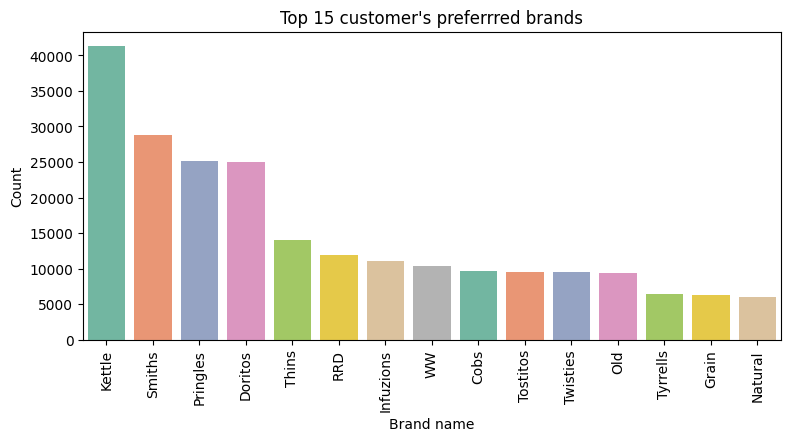

In [ ]:
# Visualizing the top 15 overall customer's preferred brands through barplot.
plt.figure(figsize = (9,4))
sns.barplot(x = merged_df['BRAND_NO'].value_counts().head(15).index, y = merged_df['BRAND_NO'].value_counts().head(15), palette = 'Set2')
plt.xticks(rotation= 90)
plt.xlabel('Brand name')
plt.ylabel('Count')
plt.title("Top 15 customer's preferrred brands")
plt.show()

***Inference:*** We have checked favourite chips brands of different types of customers before. Here in the above graph we see the top 15 preferred brand of all types of customers togather and this graph doesn't really differ much. Here also, Kettle be at the top, followed by Smiths, Pringles, Doritos. These brands are significantly on demand. There are some more brands which we might want to take in account, such as Thins, RRD, Infuzions, WW, Cobs etc.

We will look at the sales figure given by these well known brands later on in our analysis.

In [ ]:
# Creating a dataframe which will contain the types of customers and and total sales given by them.
cust_segment = merged_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index().sort_values(by = 'TOT_SALES', ascending = False)

In [ ]:
# Checking the dataframe.
cust_segment

,PREMIUM_CUSTOMER,TOT_SALES
1,Mainstream,750632.95
0,Budget,676107.55
2,Premium,506077.70


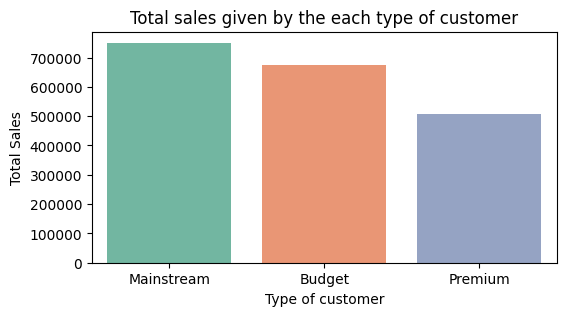

In [ ]:
# Visualizing the total sales given by the each type of customer through barplot.
plt.figure(figsize = (6,3))
sns.barplot(x = cust_segment['PREMIUM_CUSTOMER'], y = cust_segment['TOT_SALES'], palette = 'Set2')
plt.xlabel('Type of customer')
plt.ylabel('Total Sales')
plt.title('Total sales given by the each type of customer')
plt.show()

***Inference:*** The above graph shows us the sales breakdown of each type of customers. As we can see the maximum sales are coming from the mainstream customers, followed by budget and Premium customers respectively.  

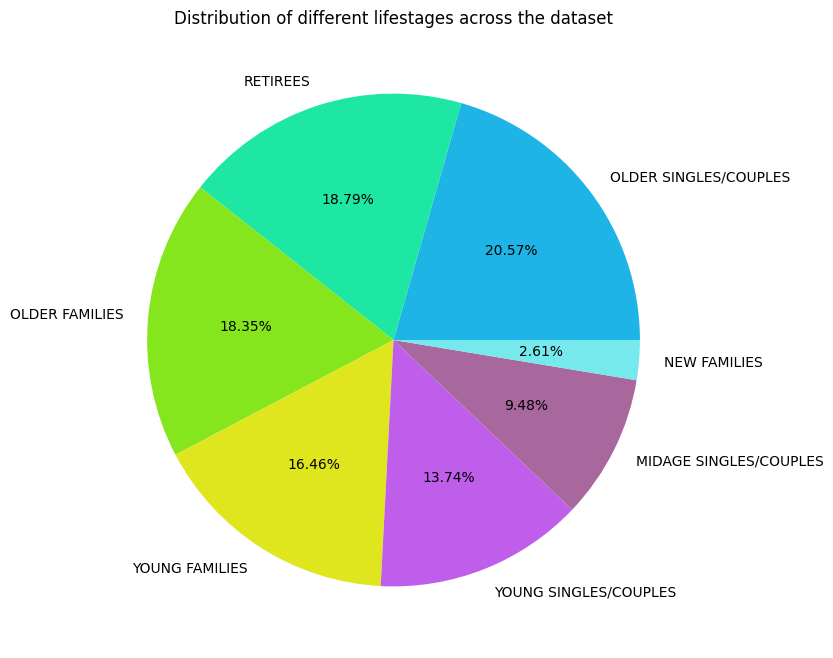

In [ ]:
# Visualizing different lifestages and their ratios in our dataset.
plt.figure(figsize = (10,8))
color = ['#1eb4e6','#1ee6a3','#85e61e','#dfe61e','#be5eeb','#a8689d','#75e9eb']
plt.pie(x = merged_df['LIFESTAGE'].value_counts(), labels = merged_df['LIFESTAGE'].value_counts().index, colors=color, autopct = '%1.2f%%')
plt.title("Distribution of different lifestages across the dataset")
plt.show()

***Inference:*** From the above graph we can see that there are more older single/couples which is around 20.5% in our dataset, followed by retirees 18.7%, older families 18.3%, young families 16.46%, young single/couples 13.74%, midage single/couples 9.48%, new families 2.61%. Let's find out who buys more chips packets.

In [ ]:
# Creating a dataframe which will contain all different lifestages of customers and total sales given them
lifestage_sales = merged_df.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index().sort_values(by = 'TOT_SALES', ascending = False)

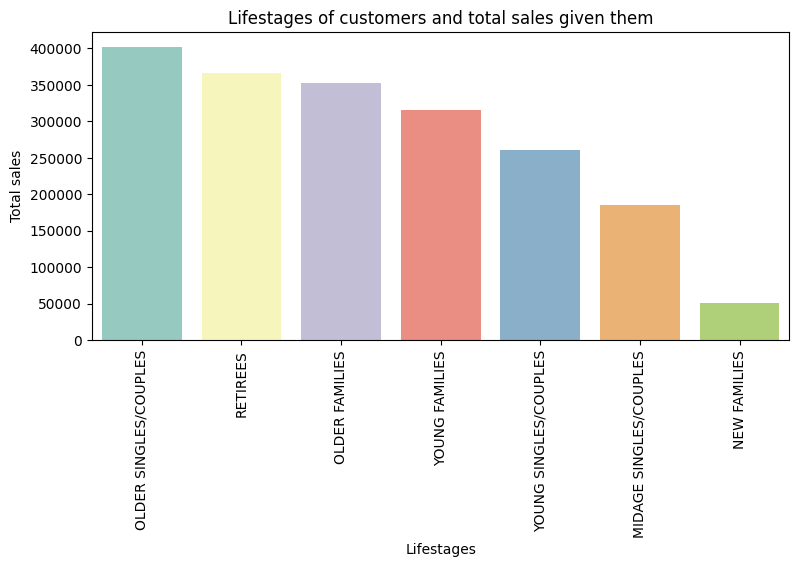

In [ ]:
# Visualizing different lifestages of customers and total sales given them through barplot.
plt.figure(figsize = (9,4))
sns.barplot(x = lifestage_sales['LIFESTAGE'], y = lifestage_sales['TOT_SALES'], palette = 'Set3')
plt.xlabel('Lifestages')
plt.ylabel('Total sales')
plt.title('Lifestages of customers and total sales given them')
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

***Inference:*** As we can see from the above graph, the maximum number of sales are coming from the older single/couples, retirees, older families.

In [ ]:
# Creating a dataframe which will have different lifestages and total chips packets bought at different lifestages.
lifestage_total_prod = merged_df.groupby('LIFESTAGE')['REVISED_PROD_QTY'].sum().reset_index().sort_values(by = 'REVISED_PROD_QTY', ascending = False)

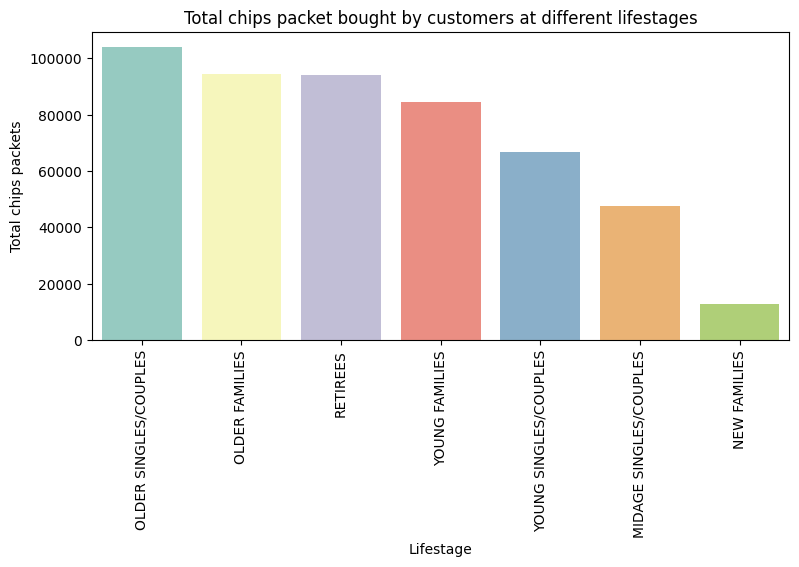

In [ ]:
# Visualizing total chips packets bought at different lifestages with the help of barplot.
plt.figure(figsize = (9,4))
sns.barplot(x = lifestage_total_prod['LIFESTAGE'], y = lifestage_total_prod['REVISED_PROD_QTY'], palette = 'Set3')
plt.title('Total chips packet bought by customers at different lifestages')
plt.xlabel('Lifestage')
plt.ylabel('Total chips packets')
plt.xticks(rotation = 90)
plt.show()

***Inefernce:*** Surprisingly Older single/couples, retirees and older families buy more number of chips packets as compared to young families, young single/ couples. One reason could be they buy chips packets for their childrens, on the other hand the young families are more health concious nowadays.

In [ ]:
merged_df.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,TOT_SALES,NEW_DATE,REVISED_PRICE,REVISED_PROD_QTY,MONTH,YEAR,LIFESTAGE,PREMIUM_CUSTOMER,BRAND_NO,SIZE_OF_PACK(GRAM)
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,6.0,2018-10-17,3.0,2,October,2018,YOUNG SINGLES/COUPLES,Premium,Natural,175
1,1,1307,348,66,CCs Nacho Cheese 175g,6.3,2019-05-14,2.1,3,May,2019,MIDAGE SINGLES/COUPLES,Budget,CCs,175
2,1,1307,346,96,WW Original Stacked Chips 160g,3.8,2018-11-10,1.9,2,November,2018,MIDAGE SINGLES/COUPLES,Budget,WW,160
3,1,1307,347,54,CCs Original 175g,2.1,2019-03-09,2.1,1,March,2019,MIDAGE SINGLES/COUPLES,Budget,CCs,175
4,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2.9,2019-05-20,2.9,1,May,2019,MIDAGE SINGLES/COUPLES,Budget,Smiths,170


<ipython-input-70-813f8e6069e0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), cmap = 'coolwarm')


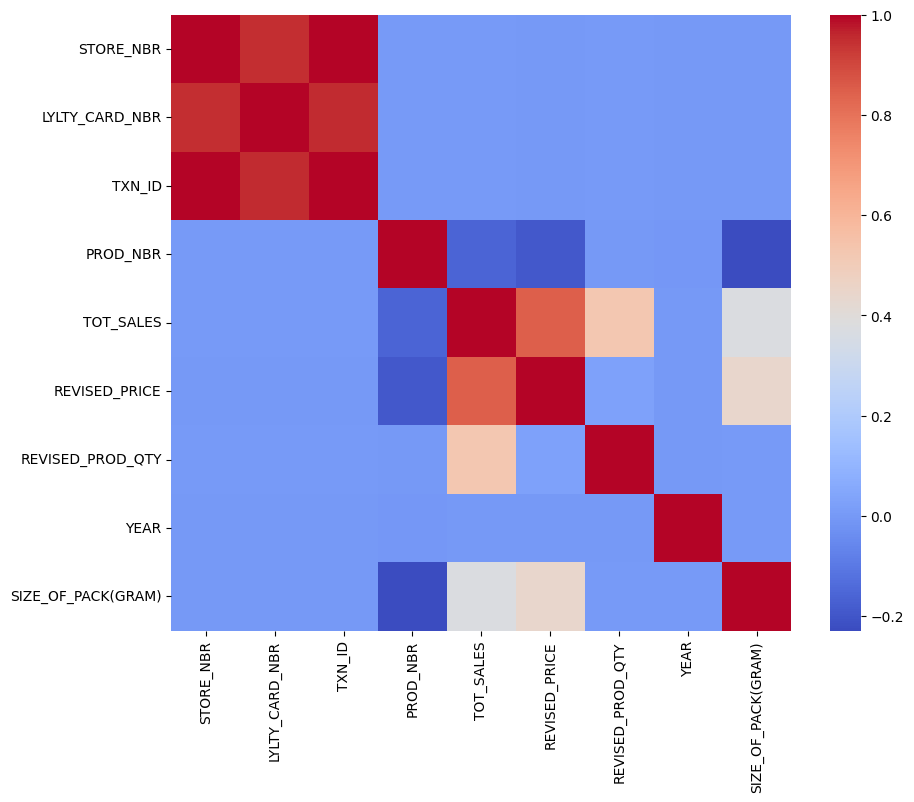

In [ ]:
# Checking the correlation between each features in our dataset.
plt.figure(figsize = (10,8))
sns.heatmap(merged_df.corr(), cmap = 'coolwarm')
plt.show()

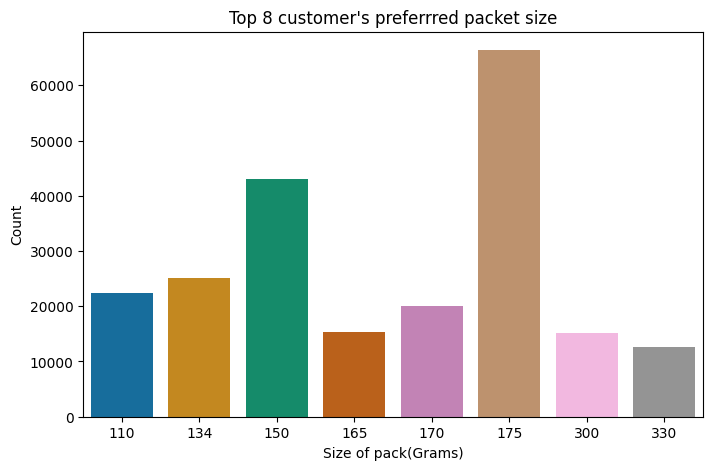

In [ ]:
# Visualizing Top 8 customer's preferrred packet size through barplot.
plt.figure(figsize = (8,5))
sns.barplot(x = merged_df['SIZE_OF_PACK(GRAM)'].value_counts().head(8).index, y = merged_df['SIZE_OF_PACK(GRAM)'].value_counts().head(8), palette = 'colorblind')
plt.xlabel('Size of pack(Grams)')
plt.ylabel('Count')
plt.title("Top 8 customer's preferred packet size")
plt.show()

***Inference:*** The above graph shows us the favourable packet size of the customers. The pack of 175gram is significantly on demand. Followed by 150, 134 and more. the packet of 175 gram is neither too big nor too small. We can assume that the customers prefer the medium sized packet.

In [ ]:
# Creating a dataframe which will contain distinct transaction_id & loyalty_card_no and total Product_quantity purchased under each dictinct transaction_id & loyalty_card_no
prod_qty_per_trans = merged_df.groupby(['TXN_ID','LYLTY_CARD_NBR'])['REVISED_PROD_QTY'].sum().reset_index().sort_values(by = 'REVISED_PROD_QTY', ascending = False)

In [ ]:
# Creating a function which will return 'yes' or 'no' based on whether the customers are multi_pack buyers or not.
def funcf(col):
  if col > 1:
    var = 'Yes'
  else:
    var = 'No'
  return var

In [ ]:
# Applying the function to the column REVISED_PROD_QTY.
prod_qty_per_trans['Multi_pack_buyers'] = prod_qty_per_trans['REVISED_PROD_QTY'].apply(funcf)

In [ ]:
# Checking the dataframe.
prod_qty_per_trans

,TXN_ID,LYLTY_CARD_NBR,REVISED_PROD_QTY,Multi_pack_buyers
114299,117420,114087,7,Yes
87047,89451,91054,6,Yes
104930,107826,106177,6,Yes
1130,1162,3014,6,Yes
105553,108462,107024,6,Yes
...,...,...,...,...
45966,47225,52280,1,No
204626,210284,210316,1,No
244368,251095,249208,1,No
244367,251094,249208,1,No


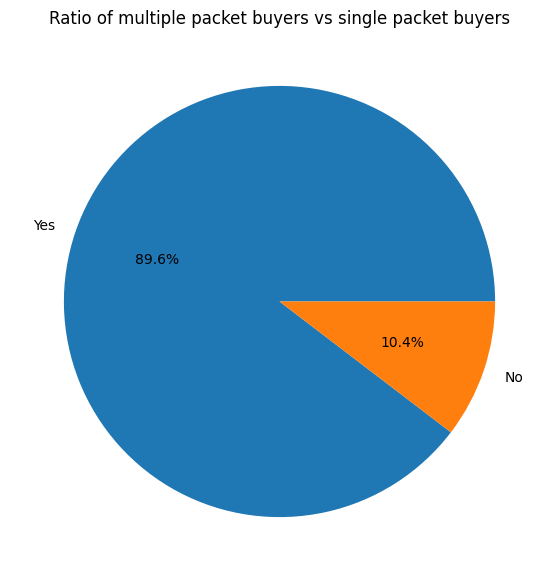

In [ ]:
# Visualizing the ratio of multiple packet buyers vs single packet buyers with the help of piechart.
plt.figure(figsize = (9,7))
plt.pie(prod_qty_per_trans['Multi_pack_buyers'].value_counts(), labels = prod_qty_per_trans['Multi_pack_buyers'].value_counts().index, autopct = '%1.1f%%')
plt.title('Ratio of multiple packet buyers vs single packet buyers')
plt.show()

***Inference:*** From the above graph we can see there are more multi-packet buyers which is almost 90%. Which is a very good sign. Only 10% or slightly higher than 10% buyers are single-pack buyers.

In [ ]:
# Creating a dataframe which will contain two columns such as Brand and theri corresponding total sales.
sales_by_brand = merged_df.groupby('BRAND_NO')['TOT_SALES'].sum().reset_index().sort_values(by = 'TOT_SALES',ascending = False)

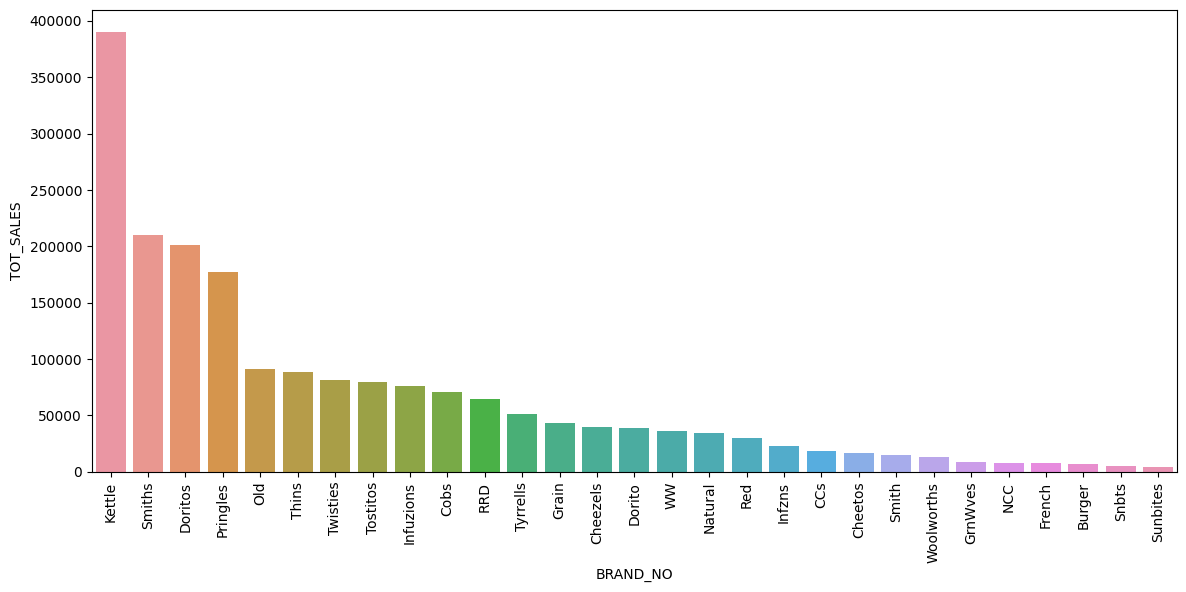

In [ ]:
# Visualizing Every brands and their corresponding total sales.
plt.figure(figsize = (14,6))
sns.barplot(x = sales_by_brand['BRAND_NO'], y = sales_by_brand['TOT_SALES'])
plt.xticks(rotation = 90)
plt.show()

***Inference:*** We have seen the top favourite brands of the customers before. Now in this graph we can see the top brands in terms of sales. Kettle be significantly at the top, followed by Smiths, Doritos, Pringles, Old, Thins etc. Dealing with this companies will bring more business for sure in the future.

In [ ]:
# Creating a copy of merged_df.
merged1 = merged_df.copy()

In [ ]:
# Creating a Dataframe monthly_sales, which will have three columns such as Year, Month, and total sales of each month for two years.
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']


merged1['MONTH'] = pd.Categorical(merged1['MONTH'], categories=month_order, ordered=True)

result_df = merged1.groupby(['YEAR', 'MONTH'])['TOT_SALES'].sum().reset_index()

sorted_result_df = result_df.sort_values(by=['YEAR', 'MONTH'], ascending=True)

monthly_sales = sorted_result_df.iloc[6:18]

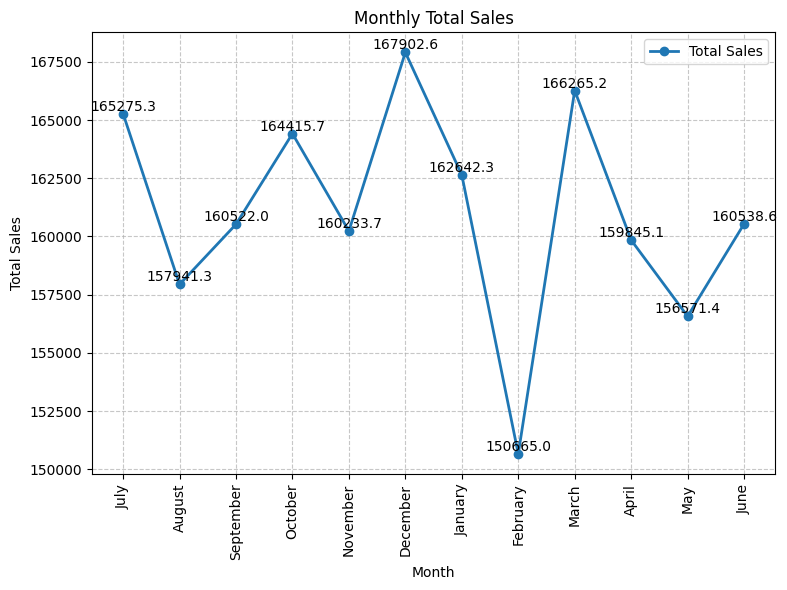

In [ ]:
# Visualizing mobthly sales for two consecutive years 2018 and 2019 through lineplot.
plt.figure(figsize = (8,6))
plt.plot(monthly_sales['MONTH'], monthly_sales['TOT_SALES'], marker='o', linewidth=2, label='Total Sales')

plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)

plt.grid(True, linestyle='--', alpha=0.7)
for x, y in zip(monthly_sales['MONTH'], monthly_sales['TOT_SALES']):
    plt.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=10)

plt.legend()

plt.tight_layout()
plt.show()

***Inference:*** The above graph shows us the monthly sales of the entire year. As wee can see there have been a lot of ups and downs in sales performance throughout the year starting from July,2018 to June,2019. The sale had gone up in the month of December, this could be because of the festivles. And it went significantly down in the month of february then again it took a pick in the month of March and so on.

# **Overall summary of our exploratory data analysis**



The project analyzed customer segments based on their spending behavior and found that mainstream customers account for the highest sales, followed by budget and premium customers.
Since mainstream customers constitute the majority of sales, focus marketing efforts on this segment to maintain their loyalty and encourage repeat purchases. Offer promotions, discounts, or loyalty programs tailored to their preferences
Among the demographic segments, older single/couples, retirees, and older families were the top buyers of chips, surpassing young families and young single/couples.
Since young families and health-conscious consumers may prefer healthier snacks, consider developing a line of healthier chip options, such as baked or low-fat varieties, to capture this growing market segment
The 175-gram packet size was the most popular, indicating customers' preference for medium-sized packets.
Multi-packet buyers accounted for approximately 90% of customers, highlighting a positive trend for repeat purchases.
Top-selling brands were Kettle, Smiths, Doritos, Pringles, Old, and Thins, presenting an opportunity for potential collaborations and business growth.
Foster strategic partnerships with these brands will bring more business for sure. Collaborations, co-branded products, or exclusive promotions can lead to increased sales and brand recognition.
Capitalize on seasonal trends, especially during festive periods like December. Plan targeted marketing campaigns and limited-time offers to leverage these peak sales opportunities.

